### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [1]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots as makeplots
import pickle
import MAIN_config_hour_of_day_total as config
#import MAIN_config_season as config

External files

In [2]:
dir_names=config.dirnames
curvefigfile="curve_pers.png"
scatterfigfile="scatter_pers.png"

In [3]:
data = pandas.read_pickle('Pers/data.p')

In [4]:
tradeoff = makeplots.tradeoff(data)

In [5]:
points = tradeoff.curve()

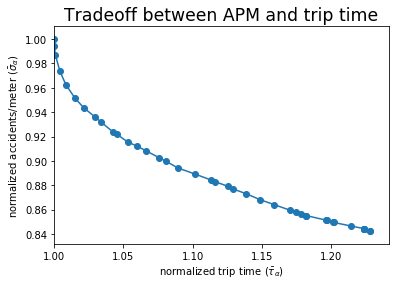

In [6]:
plotter.plot('rel_time','rel_APM',data=tradeoff.curve())

plotter.scatter(points["rel_time"],points["rel_APM"])

plotter.xlim(1,)
plotter.title("Tradeoff between APM and trip time",fontsize='xx-large')
plotter.xlabel("normalized trip time ($\\bar\\tau_{\\alpha}$)",fontsize='medium')
plotter.ylabel("normalized accidents/meter ($\\bar\sigma_{\\alpha}$)",fontsize='medium')
#legend2=plotter.legend((s1,s2,s3,s4),('$\\alpha=0.82$','$\\alpha=0.94$','$\\alpha=0.98$','$\\alpha=1.0$'),loc=3)
#plotter.legend()
#plotter.gca().add_artist(legend2)
#plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [7]:
points = points.sort_values(by='rel_time')

In [8]:
points

,rel_time,rel_APM
0.000000,1.000000,1.000000
0.452440,1.000186,0.994303
0.612664,1.000832,0.987313
0.820619,1.004241,0.973452
0.875026,1.008479,0.962545
0.914514,1.015106,0.951443
0.936448,1.021329,0.943673
0.956258,1.029335,0.936196
0.961825,1.034073,0.931654
0.967391,1.042576,0.923710


In [9]:
distList = [0.0] + [numpy.linalg.norm(points.iloc[i+1,:]-points.iloc[i,:]) for i in range(0,len(points)-1)]

In [10]:
distList

[0.0,
 0.005699542841129708,
 0.007019931143560648,
 0.014274304709135757,
 0.0117017287109378,
 0.012929317935029494,
 0.009954586110715404,
 0.010954841476005629,
 0.006563772766610505,
 0.01163639023672642,
 0.0035083596632641168,
 0.010029818475535409,
 0.007618712949702706,
 0.0074270373303772915,
 0.01101512103590619,
 0.005332745933632017,
 0.010552952865367523,
 0.013272781513683756,
 0.012629537667060096,
 0.0028269458412430804,
 0.010324760234819687,
 0.004517309785314458,
 0.01025216400466704,
 0.010653509689649593,
 0.011086511447955305,
 0.01261857079518452,
 0.004651610264631901,
 0.0036344330395714232,
 0.004104474394854511,
 8.083074823178809e-05,
 0.014661686488547496,
 0.0007264808813038791,
 0.004854677641985142,
 0.00027539192574027306,
 0.012711007608357309,
 0.0093616205567428,
 0.0,
 0.0,
 0.00031766249479490684,
 0.00457449297884466,
 0.0]

In [11]:
cursum = 0
runningSums = []
for dist in distList:
	cursum += dist
	runningSums.append(cursum)

totalLength = runningSums[-1]

In [12]:
(runningSums[2])/runningSums[-1]

0.04321124836608395

In [13]:
len(data.keys())

41

In [14]:
totTimeFrame = pandas.DataFrame(index = data[0].index)

for alpha in sorted(data.keys()):
    totTimeFrame = totTimeFrame.merge(data[alpha]['trip_time'],how='right',left_index=True,right_index=True)
    


In [15]:
totTimeFrame = totTimeFrame[~numpy.isnan(totTimeFrame.iloc[:,0])]

In [16]:
totTimeFrame.head()

trip_time_x  trip_time_y  trip_time_x  \
origin_node destination_node                                          
42421728    42434160           325.976898   325.976898   325.976898   
            42435295           403.042272   403.042272   403.042272   
            42435317           163.689127   163.689127   163.689127   
            42435323           139.602484   139.602484   139.602484   
            42438963           404.944658   404.944658   404.944658   

                              trip_time_y  trip_time_x  trip_time_y  \
origin_node destination_node                                          
42421728    42434160           325.976898   325.976898   329.867583   
            42435295           403.042272   403.042272   403.042272   
            42435317           163.689127   163.689127   163.689127   
            42435323           139.602484   139.602484   139.602484   
            42438963           404.944658   404.944658   404.944658   

                              trip_time_x  trip_time_y  trip_time_x  \
origin_node destination_node                                          
42421728    42434160           329.867583   329.867583   329.867583   
            42435295           403.042272   403.042272   403.042272   
            42435317           163.689127   163.689127   163.689127   
            42435323           139.602484   139.602484   139.602484   
            42438963           404.944658   404.944658   404.944658   

                              trip_time_y  ...  trip_time_y  trip_time_x  \
origin_node destination_node               ...                             
42421728    42434160           329.867583  ...   329.867583   329.867583   
            42435295           403.042272  ...   403.042272   403.042272   
            42435317           163.689127  ...   163.689127   163.689127   
            42435323           139.602484  ...   139.602484   139.602484   
            42438963           404.944658  ...   404.944658   404.944658   

                              trip_time_y  trip_time_x  trip_time_y  \
origin_node destination_node                                          
42421728    42434160           329.867583   329.867583   329.867583   
            42435295           403.042272   403.042272   403.042272   
            42435317           163.689127   163.689127   163.689127   
            42435323           139.602484   139.602484   139.602484   
            42438963           404.944658   404.944658   404.944658   

                              trip_time_x  trip_time_y  trip_time_x  \
origin_node destination_node                                          
42421728    42434160           329.867583   329.867583   329.867583   
            42435295           403.042272   403.042272   403.042272   
            42435317           163.689127   163.689127   163.689127   
            42435323           139.602484   139.602484   139.602484   
            42438963           404.944658   404.944658   404.944658   

                              trip_time_y   trip_time  
origin_node destination_node                           
42421728    42434160           329.867583  329.867583  
            42435295           403.042272  403.042272  
            42435317           163.689127  163.689127  
            42435323           139.602484  139.602484  
            42438963           404.944658  404.944658  

[5 rows x 41 columns]

In [17]:
times = totTimeFrame.values

In [18]:
times

array([[ 325.97689841,  325.97689841,  325.97689841, ...,  329.86758309,
         329.86758309,  329.86758309],
       [ 403.04227202,  403.04227202,  403.04227202, ...,  403.04227202,
         403.04227202,  403.04227202],
       [ 163.68912676,  163.68912676,  163.68912676, ...,  163.68912676,
         163.68912676,  163.68912676],
       ...,
       [ 348.39180117,  348.39180117,  348.39180117, ...,  375.13897075,
         375.13897075,  375.13897075],
       [1073.02697196, 1073.07473063, 1073.07473063, ..., 1103.3607667 ,
        1103.3607667 , 1103.3607667 ],
       [ 448.40412985,  448.40412985,  448.40412985, ...,  448.40412985,
         448.40412985,  448.40412985]])

In [19]:
differenced = numpy.hstack([(times[:,i] - times[:,i-1]).reshape((times.shape[0],1)) for i in range(1,times.shape[1])])

In [20]:
differenced[0]

array([0.        , 0.        , 0.        , 0.        , 3.89068467,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [21]:
alphaList = sorted(data.keys())
sums = numpy.array(runningSums)
def calc_pers(row):
    res_array = numpy.zeros(len(alphaList))
    cur_inds = [0]
    for ind,element in enumerate(row):
        if element == 0:
            cur_inds.append(ind+1)
        if element != 0 or ind == len(row)-1:
            pers = numpy.sum(sums[cur_inds[-1]]-sums[cur_inds[0]])/sums[-1] #+ (sums[cur_inds[0]]-sums[cur_inds[0]-1])/(2*sums[-1])
            res_array[cur_inds] = pers
            cur_inds = [ind+1]
    return res_array
    

In [22]:
calc_pers(differenced[0])

array([0.13145836, 0.13145836, 0.13145836, 0.13145836, 0.13145836,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 , 0.8246175 ,
       0.8246175 ])

In [23]:
pers_mat = numpy.apply_along_axis(calc_pers,-1,differenced)

In [24]:
averaged_pers = numpy.mean(pers_mat,axis=0)

In [25]:
numpy.argmax(averaged_pers)

18

In [26]:
alphaList[18]

0.9851233098702956

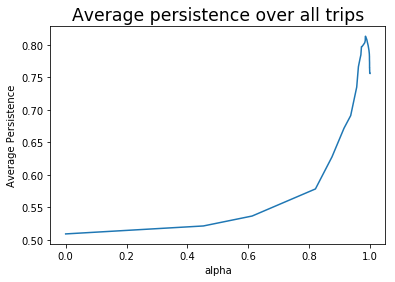

In [27]:
plotter.plot(alphaList,averaged_pers)
plotter.title('Average persistence over all trips',fontsize='xx-large')
plotter.xlabel('alpha')
plotter.ylabel('Average Persistence')
#plotter.grid(True)
plotter.savefig('avg_pers.png',bbox_inches='tight')

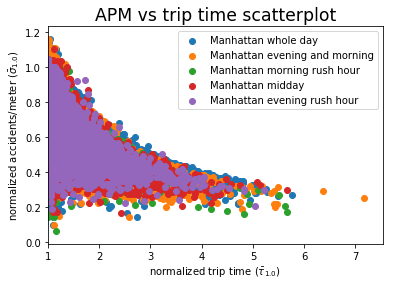

In [10]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_APM"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("APM vs trip time scatterplot",fontsize='xx-large')
plotter.xlabel("normalized trip time ($\\bar\\tau_{1.0}$)",fontsize='medium')
plotter.ylabel("normalized accidents/meter ($\\bar\sigma_{1.0}$)",fontsize='medium')
plotter.legend()
#plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [ ]:
scatterPoints.head()
anomPoints = scatterPoints[scatterPoints['trip_APM'] > 1]

In [ ]:
import folium
import folium.plugins
import osmnx
import networkx

In [ ]:
Manhattan_center=(40.766045,-73.977784)
#tiles="OpenStreetMap"
#tiles="CartoDBpositron"
#tiles="CartoDBdark_matter"
#tiles="StamenWatercolor"
#tiles="StamenToner"
tiles="StamenTerrain"

In [ ]:
### for folium ###
def getPoint(node):
    try:
        temp=G.node[node]
        (lat,lng)=(temp["y"],temp["x"])
        return (lat,lng)
    except Exception:
        return None

In [ ]:
osmnx.config(log_file=True, log_console=True, use_cache=True)
G_raw = osmnx.graph_from_place('Manhattan Island, New York, USA', network_type='drive')

In [ ]:
G=G_raw.copy()

In [ ]:
fname="origins_mid"
my_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
for o,d in anomPoints.index:
    olat,olon = getPoint(o)
    dlat,dlon = getPoint(d)
    folium.CircleMarker((olat,olon),radius=10,color='blue').add_to(my_map)
    folium.CircleMarker((dlat,dlon),radius=10,color='red').add_to(my_map)
my_map